Connecting to DSEGraph, to the "MTB" graph specifically

In [1]:


from cassandra.cluster import Cluster, EXEC_PROFILE_GRAPH_DEFAULT
from cassandra.datastax.graph import GraphProtocol
from cassandra.datastax.graph.fluent import DseGraph

host = '10.101.33.239'

# Create an execution profile, using GraphSON3 for Core graphs
ep = DseGraph.create_execution_profile(
	'mtb',
	graph_protocol=GraphProtocol.GRAPHSON_3_0)

cluster = Cluster(execution_profiles={EXEC_PROFILE_GRAPH_DEFAULT: ep}, contact_points=[host])
session = cluster.connect()

g = DseGraph.traversal_source(session=session)

In [2]:
traversal1 = g.V().has('party', 'accountNumber', '1001').next()

print(traversal1)

v[dseg:/party/1001]


In [3]:
verts = g.V()
for v in verts:
    print("***", v.id )
    for p in g.V(v).properties():
        #name = p.properties('name').value()
        print("key:",p.label, "| value: " ,p.value)

*** dseg:/party/1002
key: contactFirstName | value:  John
key: contactLastName | value:  Smith
key: contactRiskScore | value:  300
key: accountNumber | value:  1002
*** dseg:/party/1004
key: contactFirstName | value:  Joe
key: contactLastName | value:  Smo
key: contactRiskScore | value:  1
key: accountNumber | value:  1004
*** dseg:/party/1003
key: contactFirstName | value:  Jane
key: contactLastName | value:  Smith
key: contactRiskScore | value:  200
key: accountNumber | value:  1003
*** dseg:/party/1001
key: contactFirstName | value:  Eddy
key: contactLastName | value:  Wong
key: contactRiskScore | value:  700
key: accountNumber | value:  1001


In [4]:
def parseEdgeId(str):
        result = {}

        str_list = str.split('/')
        edge_str = str_list[1]
        edge_list = edge_str.split('-')
        
        result['source_label'] = edge_list[0]
        result['dest_label'] = edge_list[2]
        result['edge_label'] = edge_list[1]
        result['source_id'] = str_list[2]
        result['dest_id'] = str_list[3]

        return result

In [5]:
import networkx as nx
GG = nx.Graph()

edges = g.E()
for e in edges:
    print("***", e.id )
    es = parseEdgeId(e.id)
    GG.add_edge(es['source_id'], es['dest_id'], edge_label=es['edge_label'], \
                source_label=es['source_label'], dest_label=es['dest_label'])

*** dseg:/party-transaction-party/1001/t100/1002
*** dseg:/party-transaction-party/1002/t101/1003
*** dseg:/party-transaction-party/1002/t102/1003


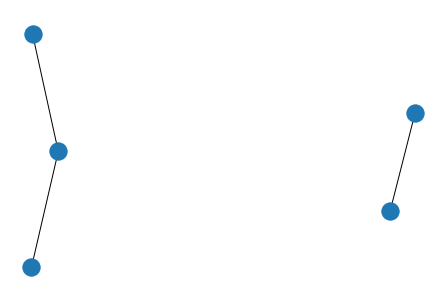

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw(GG)

In [15]:
from pyvis import network as net
import networkx as nx

nt = net.Network(notebook=True)
# populates the nodes and edges data structures
nt.from_nx(GG)
nt.show("nx.html")
